## Practical 2: Linear Regression using Gradient Descent

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import matplotlib.pyplot as plt
np.random.seed(123)

In [2]:
# Load data
X, y = datasets.load_boston(return_X_y=True)
print(f"No of data samples : {X.shape[0]}")

No of data samples : 506


In [3]:
# Split into training and testing datasets
M = 400                    # No. of samples in the training dataset
N = X.shape[0] - M         # No. of samples in the testing dataset
X_train, y_train = X[:M, ...], y[:M]
X_test , y_test  = X[M:, ...], y[M:]

In [4]:
# Reshape the data (sklearn is pedantic)
y_train, y_test = y_train[:, None], y_test[:, None]

In [5]:
# Normalize the data
scaler = StandardScaler() # To scale the X_train and X_test datasets

# Let's transform the X_train and X_test data
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [6]:
X_train = np.c_[np.ones_like(X_train[:, 0]) , X_train]
X_test  = np.c_[np.ones_like(X_test[:, 0])  , X_test ]

In [7]:
# Let's initialize our weights
w = np.random.randn(X_train.shape[-1], 1)

In [8]:
def loss(y, y_pred):
    return 0.5 * np.mean((y - y_pred) ** 2)

def loss_grad(X, y, y_pred):
    return (1./X.shape[0]) * X.T @ (y_pred - y)

In [9]:
# Start training now!
import time
import sys

epochs = 100
alpha  = 0.03
train_losses = []
test_losses  = []
for _ in range(epochs):
    y_pred = X_train @ w
    w_grad = loss_grad(X_train, y_train, y_pred)
    w = w - alpha * w_grad
    sys.stdout.write(f"\rEpochs : {_}, loss_train : {loss(y_train, y_pred):.4f}, loss_test : {loss(y_test, X_test @ w):.4f}")
    train_losses.append(loss(y_train, y_pred))
    test_losses.append(loss(y_test, X_test @ w))
    time.sleep(0.05)

Epochs : 99, loss_train : 13.3477, loss_test : 10.931446

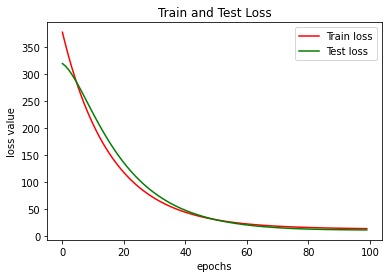

In [10]:
import matplotlib.pyplot as plt

plt.plot(train_losses, color='r', label="Train loss")
plt.plot(test_losses, color='g', label="Test loss")
plt.title("Train and Test Loss")
plt.xlabel("epochs")
plt.ylabel("loss value")
plt.legend()
plt.show()

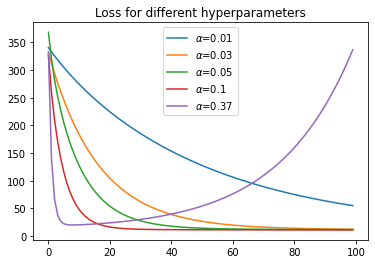

In [12]:
epochs = 100
alphas  = [0.01, 0.03, 0.05, 0.1, 0.37]
for alpha in alphas:
    w = np.random.randn(X_train.shape[-1], 1)
    train_losses = []
    for _ in range(epochs):
        y_pred = X_train @ w
        w_grad = loss_grad(X_train, y_train, y_pred)
        w = w - alpha * w_grad
        train_losses.append(loss(y_train, y_pred))
#         test_losses.append(loss(y_test, X_test @ w))
    plt.plot(train_losses, label=f"$\\alpha$={alpha}")
plt.legend()
plt.title("Loss for different hyperparameters")
plt.show()

## Linear regression using Normal Equation

In [11]:
# There are MANY ways to do it but I will use numpy's psuedoinverse
# y_hat = X @ (X.T @ X)^(-1) @ X.T @ y
try:
    w = np.linalg.pinv(X_train) @ y_train
    y_pred_train = X_train @ w
    y_pred_test  = X_test  @ w
    print(f"Best train loss : {loss(y_train, y_pred_train)}")
    print(f"Best test  loss : {loss(y_test, y_pred_test)}")
except:
    print("Training matrix is not invertible!")

Best train loss : 11.15261279208172
Best test  loss : 18.946889299800766
